In [2]:
import pandas as pd
import numpy as np
import scipy as sp
from scipy.stats import linregress
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('ICSD/two_components.txt', sep='\t')

In [4]:
data = data.drop(['MeasuredDensity', 'Unnamed: 10'], axis=1)

In [5]:
data

,CollectionCode,StructuredFormula,StructureType,Reference,StandardisedCellParameter,FormulaUnitsPerCell,Temperature,Pressure,SumFormula
0,9852,Ti O2,Anatase-TiO2,"Zeitschrift fuer Kristallographie (1972) 136, ...",3.7842 3.7842 9.5146 90.000 90.000 90.000,4,298.0,0.101325,O2 Ti1
1,9853,Ti O2,Anatase-TiO2,"Zeitschrift fuer Kristallographie (1972) 136, ...",3.7892 3.7892 9.5370 90.000 90.000 90.000,4,573.0,0.101325,O2 Ti1
2,9854,Ti O2,Anatase-TiO2,"Zeitschrift fuer Kristallographie (1972) 136, ...",3.7971 3.7971 9.5790 90.000 90.000 90.000,4,873.0,0.101325,O2 Ti1
3,9855,Ti O2,Anatase-TiO2,"Zeitschrift fuer Kristallographie (1972) 136, ...",3.8040 3.8040 9.6140 90.000 90.000 90.000,4,1073.0,0.101325,O2 Ti1
4,92363,Ti O2,Anatase-TiO2,"Ultramicroscopy (2000) 81, (*) p263-p270",3.7710 3.7710 9.4300 90.000 90.000 90.000,4,293.0,0.101325,O2 Ti1
5,93098,Ti O2,Anatase-TiO2,"Journal of Applied Crystallography (2001) 34, ...",3.7840 3.7840 9.5000 90.000 90.000 90.000,4,293.0,0.101325,O2 Ti1
6,94566,Ti O2,Anatase-TiO2,"Acta Crystallographica, Section A: Foundations...",3.8720 3.8720 9.6160 90.000 90.000 90.000,4,293.0,0.101325,O2 Ti1
7,154601,Ti O2,Anatase-TiO2,"Journal of Alloys and Compounds (2006) 413, (*...",3.7960 3.7960 9.4440 90.000 90.000 90.000,4,293.0,0.101325,O2 Ti1
8,154602,Ti O2,Anatase-TiO2,"Journal of Alloys and Compounds (2006) 413, (*...",3.7990 3.7990 9.5090 90.000 90.000 90.000,4,293.0,0.101325,O2 Ti1
9,154603,Ti O2,Anatase-TiO2,"Journal of Alloys and Compounds (2006) 413, (*...",3.7850 3.7850 9.4820 90.000 90.000 90.000,4,293.0,0.101325,O2 Ti1


## Creating a new dataframe with the relevant data

In [11]:
df = data.copy()[['CollectionCode', 'StructureType', 'StandardisedCellParameter', 'FormulaUnitsPerCell', 'Temperature', 'Pressure', 'SumFormula']]

In [7]:
def get_abc_from_cellparam(parameters):
    splitpar = [float(x) for x in parameters.split(' ')]
    return splitpar[0:3]

def set_abc(df):
    a, b, c = [], [], []
    for idx, row in df.iterrows():
        a_, b_, c_ = get_abc_from_cellparam(row.StandardisedCellParameter)
        a.append(a_)
        b.append(b_)
        c.append(c_)
    
    df['a'] = a
    df['b'] = b
    df['c'] = c
    
    df = df.drop('StandardisedCellParameter', axis=1)
    return df    

In [12]:
df = set_abc(df)

## Finding error bars: lattice parameters at ambient temperature/pressure

In [14]:
room_temp = np.bitwise_and.reduce([
    np.abs(df['Temperature'].values - 293) < 10,
    np.abs(df['Pressure'].values - 0.101325) < 0.01,
    df['SumFormula'] == 'O2 Ti1',
    df['StructureType'] == 'Rutile-TiO2'
])

In [15]:
df[room_temp]

,CollectionCode,StructureType,FormulaUnitsPerCell,Temperature,Pressure,SumFormula,a,b,c
45,9161,Rutile-TiO2,2,293.0,0.101325,O2 Ti1,4.5941,4.5941,2.9589
49,16636,Rutile-TiO2,2,293.0,0.101325,O2 Ti1,4.5940,4.5940,2.9590
50,23697,Rutile-TiO2,2,298.0,0.101325,O2 Ti1,4.5937,4.5937,2.9587
51,33837,Rutile-TiO2,2,298.0,0.101325,O2 Ti1,4.5924,4.5924,2.9575
61,34372,Rutile-TiO2,2,293.0,0.101325,O2 Ti1,4.5930,4.5930,2.9590
62,36412,Rutile-TiO2,2,298.0,0.101325,O2 Ti1,4.5930,4.5930,2.9590
66,39166,Rutile-TiO2,2,300.0,0.101325,O2 Ti1,4.5934,4.5934,2.9575
79,62677,Rutile-TiO2,2,293.0,0.101325,O2 Ti1,4.5925,4.5925,2.9578
80,62678,Rutile-TiO2,2,293.0,0.101325,O2 Ti1,4.5933,4.5933,2.9580
82,64987,Rutile-TiO2,2,293.0,0.101325,O2 Ti1,4.5845,4.5845,2.9533


In [16]:
df[room_temp][['Temperature', 'Pressure', 'a', 'b', 'c']].describe()

,Temperature,Pressure,a,b,c
count,81.000000,8.100000e+01,81.000000,81.000000,81.000000
mean,293.395062,1.013250e-01,4.594820,4.594820,2.958585
std,1.366373,1.396425e-17,0.011106,0.011106,0.007484
min,293.000000,1.013250e-01,4.530000,4.530000,2.923000
25%,293.000000,1.013250e-01,4.592700,4.592700,2.957700
50%,293.000000,1.013250e-01,4.593700,4.593700,2.958800
75%,293.000000,1.013250e-01,4.594100,4.594100,2.959400
max,300.000000,1.013250e-01,4.637000,4.637000,2.982000


## Variation of the lattice parameters with respect to the temperature

In [17]:
room_press = np.bitwise_and.reduce([
    df['Temperature'].values > 200,
    np.abs(df['Pressure'].values - 0.101325) < 0.1,
    df['SumFormula'] == 'O2 Ti1',
    df['FormulaUnitsPerCell'] == 2
])

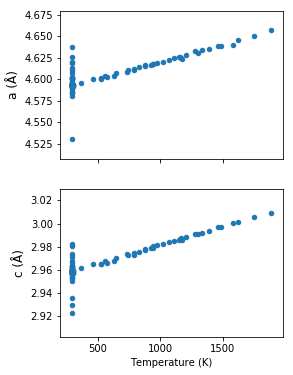

In [18]:
fig, ax_fig = plt.subplots(2, 1, figsize=(4, 6), sharex=True)

for y, ax in zip(['a', 'c'], ax_fig):
    df[room_press].sort_values(by='Temperature').plot(kind='scatter', x='Temperature', y=y, ax=ax)
    ax.set_ylabel('%s (Å)' % y, fontsize=12)

ax.set_xlabel('Temperature (K)')

plt.show()

In [19]:
df_temp = df[room_press][['a', 'c', 'Temperature']].groupby('Temperature').mean().reset_index().copy()

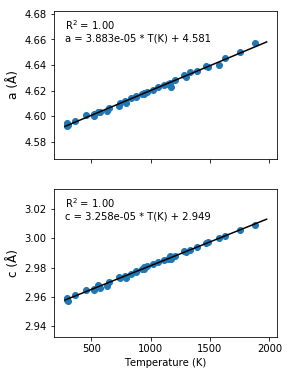

In [21]:
fig, ax_fig = plt.subplots(2, 1, figsize=(4, 6), sharex=True)

for y, ax in zip(['a', 'c'], ax_fig):
    x_ = df_temp.sort_values(by='Temperature')['Temperature'].values
    y_ = df_temp.sort_values(by='Temperature')[y].values
    
    regression = linregress(x_, y_)
    
    lims = np.array([x_.min() * .95, x_.max() * 1.05])
    
    ax.scatter(x_, y_)
    ax.plot(lims, regression.slope * lims + regression.intercept, 'k')
    info = 'R$^2$ = %.2f\n%s = %.3e * T(K) + %.3f' % (regression.rvalue, y, regression.slope, regression.intercept)
    
    ax.annotate(info, (0.05, 0.95), xycoords='axes fraction', va='top')
    
    ax.set_ylabel('%s (Å)' % y, fontsize=12)

ax.set_xlabel('Temperature (K)')

plt.show()